# Linked Data con Python

Usaremos:

* gastrodon: Toolkit to display, analyze, and visualize data and documents based on RDF graphs and the SPARQL query language using Pandas, Jupyter, and other Python ecosystem tools. https://github.com/paulhoule/gastrodon
* sys
* pandas 

<div class="alert alert-warning" role="alert" style="margin: 10px">
Para instalar la librería:<br>
jovyan@9778f76bfaea:~$ /opt/conda/bin/pip install gastrodon
</div>

## Cargamos el entorno

In [35]:
import sys
from gastrodon import RemoteEndpoint,QName,ttl,URIRef,inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from IPython.display import display, HTML
pd.options.display.width=120
pd.options.display.max_colwidth=100

import pandas as pd
import json
from SPARQLWrapper import SPARQLWrapper, JSON

def get_sparql_dataframe(service, query):
    """
    Helper function to convert SPARQL results into a Pandas data frame.
    """
    sparql = SPARQLWrapper(service)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()

    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']

    out = []
    for row in processed_results['results']['bindings']:
        item = []
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)

    return pd.DataFrame(out, columns=cols)

Definimos los prefijos que de los "namespace" a utilizar

In [36]:
prefixes=inline("""
    @prefix : <http://dbpedia.org/resource/> .
    @prefix dbp: <http://dbpedia.org/ontology/> .
    @prefix pr: <http://dbpedia.org/property/> .
    @prefix foaf: <http://xmlns.com/foaf/0.1/> .
""").graph

Y el endpoint sobre el que vamos a hacer las consultas. En este caso, dbpedia.

In [37]:
endpoint=RemoteEndpoint(
    "http://dbpedia.org/sparql/"
    ,default_graph="http://dbpedia.org"
    ,prefixes=prefixes
    ,base_uri="http://dbpedia.org/resource/"
)

## Tripletas en DBpedia

Con una consulta simple, podemos contar el número de tripletas

In [38]:
count=endpoint.select("""
    SELECT (COUNT(*) AS ?count) { ?s ?p ?o .}
""").at[0,"count"]
count

438336346

## Número de predicados

Para la siguiente consulta, hacemos una lista de predicados comunes. El número de respuestas en el endpoint de DBPEDIA está limitado a 10000.

Each predicate is a relationship between a topic and either another topic or a literal value.  For instance,  the **rdf:type** predicate links a topic to another topic representing a class that the first topic is an instance,  for instance:

```
<Alan_Alda> rdf:type on:Person .
```

**rdfs:label**,  on the other hand,  links topics to literal values,  such as

```
<Alan_Alda> rdfs:label 
                "Alan Alda"@en,
                "アラン・アルダ"@ja . 
```

Strings in RDF (like the one above) are unusual compared to other computer languages because they can contain language tags,  a particularly helpful feature for multilingual databases such as DBpedia.

In [39]:
predicates=endpoint.select("""
    SELECT ?p (COUNT(*) AS ?count) { ?s ?p ?o .} GROUP BY ?p ORDER BY DESC(?count)
""")
predicates

,count
p,
rdf:type,113715836
http://www.w3.org/2002/07/owl#sameAs,33623686
http://purl.org/dc/terms/subject,23990492
rdfs:label,22430849
http://www.w3.org/ns/prov#wasDerivedFrom,15801282
dbp:wikiPageID,15797808
dbp:wikiPageRevisionID,15797808
http://purl.org/dc/elements/1.1/language,12845235
foaf:primaryTopic,12845232


Podemos enseñar solo los N primeros resultados

In [40]:
predicates.head(30)

,count
p,
rdf:type,113715836
http://www.w3.org/2002/07/owl#sameAs,33623686
http://purl.org/dc/terms/subject,23990492
rdfs:label,22430849
http://www.w3.org/ns/prov#wasDerivedFrom,15801282
dbp:wikiPageID,15797808
dbp:wikiPageRevisionID,15797808
http://purl.org/dc/elements/1.1/language,12845235
foaf:primaryTopic,12845232


O los últimos

In [41]:
predicates.tail()

,count
p,
pr:buschCarTeam,135
pr:majorsites,135
ns1:v4b,135
ns10:a,135
pr:seats1Last,134


## Visualización de resultados

**dbp:Image** Algunos resultados de dbpedia son links a imagenes, que gracias a Jupyter, podemos visualizarlos

In [42]:
endpoint.select("""
    SELECT (COUNT(*) AS ?count) { SELECT DISTINCT ?type { ?s a ?type .} }
""")

,count
0,483605


In [43]:
types=endpoint.select("""
    SELECT ?type (COUNT(*) AS ?count) { ?s a ?type .} GROUP BY ?type ORDER BY DESC(?count)
""")
types[types.index.str.startswith('dbp:')]

,count
type,
dbp:Image,2897004
dbp:Person,1818071
dbp:Agent,1546261
dbp:TimePeriod,1127706
dbp:CareerStation,977023
dbp:Place,881597
dbp:Location,839987
dbp:Settlement,581293
dbp:PopulatedPlace,516747


In [44]:
pics = endpoint.select("""
    SELECT ?that { 
        ?that a dbp:Image
    } LIMIT 10
""")
pics

,that
0,http://en.wikipedia.org/wiki/Special:FilePath/Alfred_Schütz.jpg
1,http://en.wikipedia.org/wiki/Special:FilePath/Aromas.JPG
2,http://en.wikipedia.org/wiki/Special:FilePath/Baldwin_Park_CA_logo.jpg
3,"http://en.wikipedia.org/wiki/Special:FilePath/Bayfield,CO.jpg"
4,http://en.wikipedia.org/wiki/Special:FilePath/Bennettcoskyline.JPG
5,http://en.wikipedia.org/wiki/Special:FilePath/Bitterspring.jpg
6,http://en.wikipedia.org/wiki/Special:FilePath/Boulder_Creek.jpg
7,http://en.wikipedia.org/wiki/Special:FilePath/BrandonFL.gif
8,http://en.wikipedia.org/wiki/Special:FilePath/Buttonwillow.jpg
9,http://en.wikipedia.org/wiki/Special:FilePath/CarberryBookplate.jpg


In [45]:
HTML('<img src="{0}">'.format(pics.at[9,'that']))

## Ejercicio 1

Muestra la imagen de un escritor/a vivo

In [46]:
escritores = endpoint.select("""
SELECT ?nombre ?foto
WHERE{
    ?autor a dbp:Writer .
    ?autor foaf:name ?nombre .
    ?autor dbp:birthDate ?fechaNac .
    ?autor foaf:depiction ?foto
    FILTER NOT EXISTS { ?autor dbo:deathDate ?death. }
} 
LIMIT 100
""")
escritores

,nombre,foto
0,Alice Walker,http://commons.wikimedia.org/wiki/Special:FilePath/Alice_Walker.jpg
1,Alice Walker,http://commons.wikimedia.org/wiki/Special:FilePath/Alice_Walker.jpg
2,Amy Tan,http://commons.wikimedia.org/wiki/Special:FilePath/Amy_Tan.jpg
3,Amy Tan,http://commons.wikimedia.org/wiki/Special:FilePath/Amy_Tan.jpg
4,Eric Corley,http://commons.wikimedia.org/wiki/Special:FilePath/Emmanuel_Goldstein_Chaos_Communication_Camp_2...
5,Greg Bear,http://commons.wikimedia.org/wiki/Special:FilePath/Greg_Bear.jpg
6,Greg Bear,http://commons.wikimedia.org/wiki/Special:FilePath/Greg_Bear.jpg
7,Gregory Benford,http://commons.wikimedia.org/wiki/Special:FilePath/GB_UTOPIALES_2008.jpg
8,Gregory Benford,http://commons.wikimedia.org/wiki/Special:FilePath/GB_UTOPIALES_2008.jpg
9,Harry Turtledove,http://commons.wikimedia.org/wiki/Special:FilePath/Harry_Turtledove_2005.jpg


In [47]:
HTML('<img src="{0}">'.format(escritores.at[99,'foto']))

Los datos se pueden recoger en distintos tipos de estructuras para mostrarlos en gráficos. Veamos un ejemplo de un diagrama de barras.

In [48]:
places = endpoint.select("""
SELECT ?city ?population
WHERE{
    ?city a dbp:PopulatedPlace .
    ?city dbp:populationTotal ?population
    FILTER (?population > 1000000)
} 
ORDER BY ASC(?population)
LIMIT 100
""")

In [49]:
places.head(10)

,city,population
0,<Padang>,1000096
1,<Latifabad_Taluka>,1000761
2,<Opole_Voivodeship>,1000858
3,"<Kota,_Rajasthan>",1001694
4,<Tulungagung_Regency>,1002807
5,"<St._Louis_County,_Missouri>",1003362
6,<Cesar_Department>,1004064
7,<Rukwa_Region>,1004539
8,<Zaoyang>,1004741
9,<Metropolitan_City_of_Bologna>,1005831


0                          <Padang>
1                <Latifabad_Taluka>
2               <Opole_Voivodeship>
3                 <Kota,_Rajasthan>
4             <Tulungagung_Regency>
5      <St._Louis_County,_Missouri>
6                <Cesar_Department>
7                    <Rukwa_Region>
8                         <Zaoyang>
9    <Metropolitan_City_of_Bologna>
Name: city, dtype: object

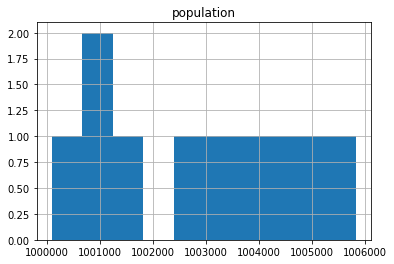

In [50]:
places.head(10).hist()
places.head(10)['city']

# Ejercicios de consultas

<div class="alert alert-warning" role="alert" style="margin: 10px">
La librería a veces tiene problemas con las fechas. Si es así, colocal la consulta en el endpoint directamente para comprobar que si el problema está en la consulta o en el paquete.
</div>

1. Obtener la masa de 10 estrellas

In [51]:
stars = endpoint.select("""
SELECT DISTINCT ?name ?mass
WHERE{
    ?star a dbp:Star .
    ?star rdfs:label ?name .
    ?star pr:mass ?mass
} 
GROUP BY ?star
LIMIT 10
""")
stars.head(10)

,name,mass
0,Lacaille 9352,0.503
1,Ross 128,0.15
2,参宿六,15.5
3,Alcyone (ster),3.4
4,18 Scorpii,1.02
5,Alpha Monocerotis,2.02
6,Cursa,2
7,كلب الراعي (نجم),1.13
8,Beta Ophiuchi,≥ 1
9,毕宿一,>7.6


2. Constelación a la que pertenece cada estrella 

In [52]:
stars = endpoint.select("""
SELECT DISTINCT ?name ?constellName
WHERE{
    ?star a dbp:Star .
    ?star rdfs:label ?name .
    ?star pr:constell ?constell .
    ?constell rdfs:label ?constellName
} 
GROUP BY ?star
LIMIT 10
""")
stars.head(10)

,name,constellName
0,Pi2 Columbae,Colombe (constellation)
1,Pi2 Columbae,Gwiazdozbiór Gołębia
2,Alpha Volantis,Volans
3,Theta Volantis,Pesce Volante (costellazione)
4,Theta Volantis,Pesce Volante (costellazione)
5,Theta Volantis,とびうお座
6,HD 76700,Fliegender Fisch (Sternbild)
7,Ni2 Columbae,Colomba (costellazione)
8,Beta Volantis,Poisson volant (constellation)
9,Iota Pictoris,Pictor


3. Distancia a la que está la estrella Kepler-19 

In [53]:
kepler = endpoint.select("""
SELECT ?name ?distance
WHERE{
    ?star a dbp:Star .
    ?star rdfs:label ?name .
    ?star pr:distance ?distance
    FILTER contains(lcase(str(?name)),"kepler-19")
} 
LIMIT 1
""")
kepler

,name,distance
0,Kepler-19,6910


4. Estrellas pertenecientes a la constelación Centaurus 

Se puede hacer de dos maneras: seleccionar todas las estrellas cuyo nombre de contelación contenga centaurus, pero esto devuelve también estrellas que pertenencen a la constellación "centaurus (constellation)". Para solo tener las que de verdad corresponder a la resource de dbpedia Centaurus, lo siguiente funciona:

In [54]:
centaurus = endpoint.select("""
SELECT DISTINCT ?star
WHERE{
    ?star a dbp:Star .
    ?star pr:constell <http://dbpedia.org/resource/Centaurus> .
    ?star rdfs:label ?name .
} 
GROUP BY ?star
""")
centaurus

""
star
<HD_113766>
<HD_108063>
<4_Centauri>
<Upsilon2_Centauri>
<HD_117618>
<2M1207>
<HD_117939>
<HD_129116>
<Pi_Centauri>


También se podría poner el ?name después del select pero en este caso se repiten estrellas que tengan un nombre distinto en distintos idiomas.

5. Obtener la población total de Londres 

In [55]:
service = "http://dbpedia.org/sparql"
query = """
  PREFIX dbp: <http://dbpedia.org/ontology/>
  PREFIX pr: <http://dbpedia.org/property/>
  PREFIX foaf: <http://xmlns.com/foaf/0.1/>

  SELECT ?city ?name ?population
  WHERE{
   ?city a dbp:PopulatedPlace .
   ?city foaf:name ?name .
   ?city dbp:populationTotal ?population .
   FILTER (?name = "London"@en)
  } LIMIT 1
  """

df = get_sparql_dataframe(service, query)

df


,city,name,population
0,http://dbpedia.org/resource/London,London,8673713


6. Gente que nació en Londres antes de 1900 

In [56]:
query = """
  PREFIX dbp: <http://dbpedia.org/ontology/>
  PREFIX pr: <http://dbpedia.org/property/>
  PREFIX foaf: <http://xmlns.com/foaf/0.1/>

  SELECT DISTINCT ?peopleName ?birthDate
  WHERE{
    ?people a dbp:Person .
    ?people pr:birthPlace <http://dbpedia.org/resource/London> .
    ?people foaf:name ?peopleName .
    ?people pr:birthDate ?birthDate .
    
    FILTER (?birthDate < xsd:dateTime('1900-01-01T00:00:00Z'))
  } 
  """

df = get_sparql_dataframe(service, query)

df

,peopleName,birthDate
0,Ben Griffin,1977
1,"George Townshend, 1st Marquess Townshend",1724-02-28
2,The Marquess Townshend,1724-02-28
3,James Valentine,1887-08-22
4,George Collier,1738-05-11
5,Sir George Collier,1738-05-11
6,George Thomas Dorrell,1880-07-07
7,Matthew Fontaine Maury Meiklejohn,1870-11-27
8,"Sir George Cockburn, 10th Baronet",1772-04-22
9,"Sir George Cockburn, Bt",1772-04-22


7. Nombre y fechas de nacimiento y de muerte de toda la gente nacida en Londres entre 1900 y 1950. 

In [57]:
query = """
   PREFIX dbp: <http://dbpedia.org/ontology/>
   PREFIX pr: <http://dbpedia.org/property/>
   PREFIX foaf: <http://xmlns.com/foaf/0.1/>

   SELECT DISTINCT ?peopleName ?birthDate ?deathDate
   WHERE{
    ?people a dbp:Person .
    ?people pr:birthPlace <http://dbpedia.org/resource/London> .
    ?people foaf:name ?peopleName .
    ?people pr:birthDate ?birthDate .
    ?people pr:deathDate ?deathDate .
    
    FILTER (?birthDate > xsd:dateTime('1900-01-01T00:00:00Z') AND ?birthDate < xsd:dateTime('1950-01-01T00:00:00Z'))
} 
  """

df = get_sparql_dataframe(service, query)

df


,peopleName,birthDate,deathDate
0,Douglas Bader,1910-02-21,1982-09-05
1,Sidney Bates,1921-06-14,1944-08-08
2,Carter B. Magruder,1900-04-03,1988-03-14
3,Alf Rainbow,1900-04-01,1963-12-17
4,Robert Stanford Tuck,1916-07-01,1987-05-05
5,Roland Robert Stanford Tuck,1916-07-01,1987-05-05
6,Ian Edward Fraser,1920-12-18,2008-09-01
7,Michael Allmand,1923-08-22,1944-06-24
8,Edward Cecil Mitford,1908-11-20,2002-07-16
9,Edward Cecil Osbaldeston Mitford,1908-11-20,2002-07-16


8. Nombre y fecha de nacimiento de los actores nacidos en Londres después de 1930 que siguen vivos.

In [58]:
query = """
   PREFIX dbp: <http://dbpedia.org/ontology/>
   PREFIX pr: <http://dbpedia.org/property/>
   PREFIX foaf: <http://xmlns.com/foaf/0.1/>

   SELECT DISTINCT ?peopleName ?birthDate
   WHERE{
    ?people a dbp:Person .
    ?people pr:birthPlace <http://dbpedia.org/resource/London> .
    ?people foaf:name ?peopleName .
    ?people pr:birthDate ?birthDate .
    
    FILTER (?birthDate > xsd:dateTime('1930-01-01T00:00:00Z')) .
    FILTER NOT EXISTS {?people pr:deathDate ?deathDate}
} 
  """

df = get_sparql_dataframe(service, query)

df

,peopleName,birthDate
0,David Williams,1987-01-29
1,Dave Williams,1987-01-29
2,Ian Roberts,1965-07-31
3,Ian Robertson,1945-01-17
4,Tiffany Zahorski,1994-08-16
5,Jonathan Webb,1963-08-24
6,Jamie Gibson,1990-09-27
7,David Park,1974-06-25
8,Andy Saull,1988-09-27
9,Tom French,1983-11-27


9. Fotos de 10 de los actores nacidos en Londres después de 1930 que siguen vivos.

No he logrado correr este comando fuera del endpoint o sea que no puede poner las fotos aquí, pero si que se pueden añadir las URL a las fotos con la query que hacemos.

In [59]:
query = """
   PREFIX dbp: <http://dbpedia.org/ontology/>
   PREFIX pr: <http://dbpedia.org/property/>
   PREFIX foaf: <http://xmlns.com/foaf/0.1/>

   SELECT DISTINCT ?peopleName ?birthDate ?picture
   WHERE{
    ?people a dbp:Person .
    ?people pr:profesion <http://dbpedia.org/resource/Actor> .

    ?people pr:birthPlace <http://dbpedia.org/resource/London> .
    ?people foaf:name ?peopleName .
    ?people pr:birthDate ?birthDate .
    ?people foaf:depiction ?picture .
    
    FILTER (?birthDate > xsd:dateTime('1930-01-01T00:00:00Z')) .
    FILTER NOT EXISTS {?people pr:deathDate ?deathDate}
} 
LIMIT 10
  """

df = get_sparql_dataframe(service, query)

df



,peopleName,birthDate,picture


Se puede correr este comando aquí solamente si quitamos la condición de que el actor haya nacido después de 1930.

In [60]:
people = endpoint.select("""
SELECT DISTINCT ?picture
WHERE{
    ?people a dbp:Person .

    ?people pr:birthPlace <http://dbpedia.org/resource/London> .
    ?people foaf:name ?peopleName .
    ?people foaf:depiction ?picture .

    FILTER NOT EXISTS {?people pr:deathDate ?deathDate}
} 
LIMIT 10
""")
people

#Let's plot only a few pictures since it takes a while
HTML('<img src="{0}">'.format(people.at[0,'picture']))

In [61]:
HTML('<img src="{0}">'.format(people.at[1,'picture']))

10 . Histograma de las 10 peliculas más largas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0efeb60358>]],
      dtype=object)

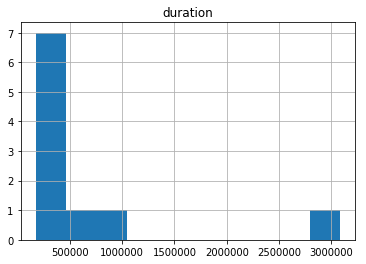

In [62]:
movies = endpoint.select("""
SELECT DISTINCT ?movie ?duration
WHERE {
    ?movie a dbp:Film .
    ?movie dbp:runtime ?duration 
} 
ORDER BY DESC(?duration)
LIMIT 10
""")

movies
movies.hist()